<a href="https://colab.research.google.com/github/rafaelviniciusoliveira/Digital-filter-project/blob/main/PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.fft import fft,fftfreq,ifft,rfft,irfft,rfftfreq
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import oaconvolve, decimate,firwin,lfilter
from scipy.io.wavfile import write
from scipy.io import wavfile

In [ ]:
def convSS(b, x,zi=None):
    M = b.shape[0] # comprimento da filtro 
    N = 2<<(M-1).bit_length()  # comprimento da FFT 
    L = N - M + 1 # comprimento do sinal a ser filtrado em um segmento  
    L_sig = x.shape[0] # comprimento do sinal de entrada 
    segmentos = range(0, L_sig, L)
    y = np.zeros(L_sig+N,dtype=np.complex128)

    Hk = fft(b, n=N)
    
    #overlap and add
    for n in segmentos:
        y[n:n+N] += ifft(fft(x[n:n+L], n=N)*Hk)

    return y[:L_sig]

In [ ]:
#Carrega o arquivo
samplerate, data = wavfile.read('C:/Users/frank/Desktop/ufrn/2020.2/Processamento Digital de Sinais/Gravacao.wav')

#Carrega o arquivo em dois canais (audio estereo)
print(f"numero de canais = {data.shape[1]}")

#Tempo total = numero de amostras / fs
length = data.shape[0] / samplerate
print(f"duracao = {length}s")

numero de canais = 2
duracao = 12.970666666666666s


In [ ]:
print("x:",data[:,0].size)
print("fs:",samplerate)

x: 622592
fs: 48000


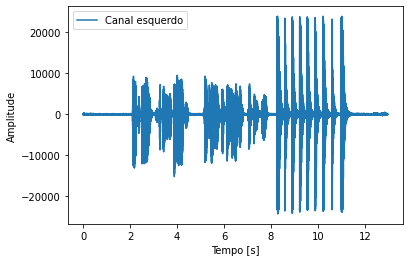

In [ ]:
#Plota as figuras ao longo do tempo

#Interpola para determinar eixo do tempo
time = np.linspace(0., length, data.shape[0])

#Plota os canais esquerdo e direito
plt.figure(1)
plt.plot(time,data[:,0], label="Canal esquerdo")
plt.legend()
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

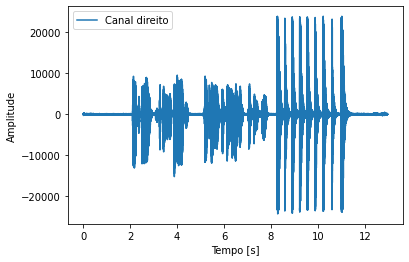

In [ ]:
plt.figure(2)
plt.plot(time, data[:, 1], label="Canal direito")
plt.legend()
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

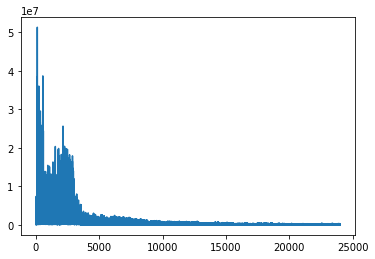

In [ ]:
N = data[:,0].size

fs = samplerate

T = 1.0 / fs

xf = fftfreq(N,T)

y = data[:,0]
yf = fft(y)

plt.plot(xf[:N//2],abs(yf[0:N//2]))

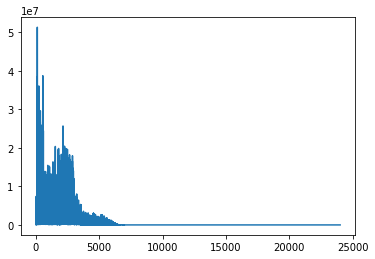

In [ ]:
fir = np.genfromtxt("C:/Users/frank/Desktop/ufrn/2020.2/Processamento Digital de Sinais/fir4.csv",delimiter=",")
# convolução em bloco metodo da sobreposição e soma
convolucao = convSS(fir,y)

fyt = fft(convolucao)
N = fyt.size
xf = fftfreq(N,T)

plt.plot(xf[:N//2],abs(fyt[0:N//2]))

C:\Users\frank\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


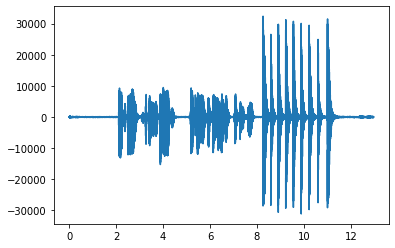

In [ ]:
time = np.linspace(0., length, len(convolucao))
plt.plot(time,convolucao)

In [ ]:
Y = ifft(fyt[0:N])
scaled = np.int16(Y/np.max(np.abs(Y)) * 32767)
write('filtro_fir.wav', samplerate, scaled)

<ipython-input-100-fed3e49da3ec>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  scaled = np.int16(Y/np.max(np.abs(Y)) * 32767)


In [ ]:
def dizimacao1(fir,x,M):

    convolucao = convSS(fir,x)
    cont = 0
    y=[0]*(convolucao.size//2)
    for i in range(0,convolucao.size,M):
        y[cont] = convolucao[i]
        cont = cont + 1

    return y

C:\Users\frank\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


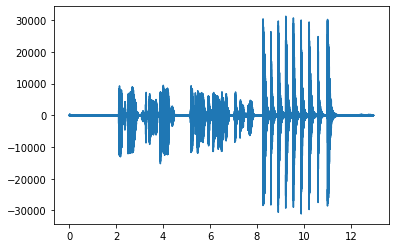

In [ ]:
dizimacao = dizimacao1(fir,y,2)
time = np.linspace(0., length,len(dizimacao))
plt.plot(time[:N],dizimacao)

In [ ]:
scaled = np.int16(dizimacao/np.max(np.abs(dizimacao)) * 32767)
write('dezimacao.wav', samplerate//2, scaled)

<ipython-input-103-b0283500a255>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  scaled = np.int16(dizimacao/np.max(np.abs(dizimacao)) * 32767)


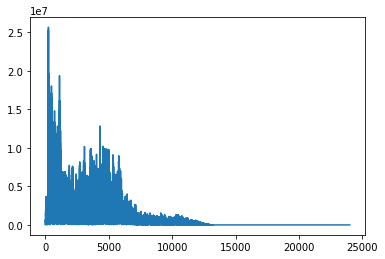

In [ ]:
# Number of sample points

N = len(dizimacao)
# sample spacing

fs = samplerate

T = 1.0 / fs

xf = fftfreq(N,T)

yf = fft(dizimacao)

plt.plot(xf[0:N//2],abs(yf[0:N//2]))